In [3]:
import uncertainties as u
import numpy as np

A = u.ufloat(2, 0.2)
B = u.ufloat(3, 0.03)

A+B, np.sqrt(0.2**2 + 0.03**2)

(5.0+/-0.20223748416156687, 0.20223748416156687)

In [4]:
A**B

8.0+/-2.405758527700087

In [7]:
rho = u.ufloat(1.1, 0.2) / u.ufloat(0.7, 0.05)
print(rho)
print(f'{rho:1.3f}')

1.57+/-0.31
1.571+/-0.307


In [15]:
from uncertainties.umath import __all__
from uncertainties.umath import *
uexp = u.wrap(np.exp)

print(uexp(u.ufloat(2, 0.5)))
uexp(u.ufloat(2,0.5))

7+/-4


7.38905609893065+/-3.6945280507206917

0.00+/-0.11
0.0+/-1.1


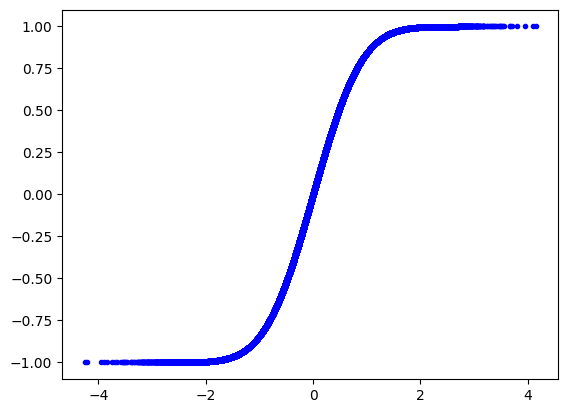

In [27]:
from scipy.special import erf
x = u.ufloat(0,0.1)

uerf = u.wrap(erf)
print(uerf(x))
#is that right, check with monte carlo:
X = np.random.normal(0.0, 0.1, (50000,))
Y = erf(X)
np.mean(Y), np.std(Y)


x = u.ufloat(0, 1)
print(uerf(x))
# In this case the monte carlo simulation does not work right:
X = np.random.normal(0.0, 1.0, (50000,))
Y = erf(X)
np.mean(Y), np.std(Y)
import matplotlib.pyplot as plt
plt.plot(X,Y, 'b.')

-0.00+/-0.05


(0.4783780150019418, 0.028222549242296533)

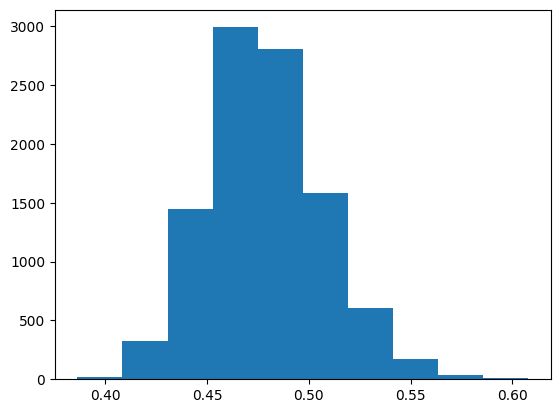

In [39]:
from scipy.special import erf

def f(x, a):
    return a*erf(x) - 1

from scipy.optimize import fsolve
a = u.ufloat(2, 0.1)
x0 = 1.0

def g(x0, a):
    sol, = fsolve(f, x0, args=(a,))
    return sol

u.wrap(g)(x0, a)# range of f(x0)
print(f(0.4769362762044693,a))

# normal way would be this:
A = np.random.normal(2, 0.1, (10000,))
y = [g(0.47, a) for a in A]
plt.hist(y)
np.mean(y), np.std(y)